# ***World Happiness Report 2024*** : Cleaning and Exploratory Data Analysis

### Introduction to the World Happiness Report 2024 Dataset

The **World Happiness Report 2024** provides a comprehensive analysis of the state of global happiness as measured by various factors affecting well-being across different countries. The dataset aims to offer insights into the subjective well-being of populations, reflecting how individuals perceive their lives in various contexts. The data collected for this report primarily focuses on the year 2023, capturing the latest trends and variations in happiness levels worldwide. The **Sustainable Development Solutions Network (SDSN)**, an initiative of the United Nations, is responsible for gathering and analyzing this data. 

This report highlights the intricate relationships between happiness and numerous factors, including economic conditions, social support, and personal freedom. By examining these correlations, the World Happiness Report seeks to inform policymakers and stakeholders on how to improve societal well-being and foster environments where individuals can thrive.

### Dataset Columns and Their Explanations

1. **Country Name**: Represents the name of each country included in the report.
   
2. **Regional Indicator**: Identifies the region or group each country belongs to, such as **Western Europe**, **Middle East and North Africa**, etc.

3. **Ladder Score**: A quantitative measure of life satisfaction based on the **Cantril Ladder method**. Respondents rate their satisfaction on a scale from 0 to 10, with higher scores indicating greater satisfaction. This score reflects the average perceived well-being among surveyed individuals.

4. **Upper Whisker**: Represents the upper bound of the confidence interval for the ladder score, indicating the highest estimate we can expect. For example, an upper whisker of 7.0 suggests we are 95% confident that the true score is below this value.

5. **Lower Whisker**: Denotes the lower bound of the confidence interval for the ladder score, indicating the lowest expected estimate. A lower whisker of 6.0 implies that we are 95% confident that the true score is above this value.

6. **Log GDP per Capita**: A transformed economic indicator that provides insights into economic well-being per person. It helps normalize data across countries with varying GDP levels.

7. **Social Support**: Measures the perceived availability of assistance from family and community, scored from 0 to 2, where 0 indicates no support and 2 indicates strong community ties.

8. **Healthy Life Expectancy (HLE)**: Reflects the average number of years individuals can expect to live in good health. Values are typically normalized between 0 and 1, with higher values indicating better health outcomes.

9. **Freedom to Make Life Choices**: Assesses individuals' perceived freedom in making life decisions, scored from 0 to 1, where 0 indicates low freedom and 1 indicates high freedom.

10. **Generosity**: Measures the willingness of individuals to give to others, normalized to a 0-1 scale, where 0 indicates very low generosity and 1 indicates very high generosity.

11. **Perceptions of Corruption**: Reflects views on corruption levels in government and institutions, scored and normalized to a 0-1 range.

12. **Dystopia + Residual**: Represents a baseline for the lowest possible happiness, with the residual value reflecting additional factors contributing to a country's happiness.

### Standardization Methods Used in the Dataset

The dataset employs various standardization techniques to ensure comparability and interpretability:

- **Z-score Standardization**: Converts data to a distribution with a mean of 0 and a standard deviation of 1, useful for normally distributed data.
  
- **Min-Max Normalization**: Rescales data to a fixed range, usually [0, 1], making it suitable for algorithms requiring bounded data.
  
- **Log Transformation**: Applies the logarithm to reduce skewness in economic data, helping to stabilize variance and achieve a more normal distribution.

### Conclusion

By analyzing the World Happiness Report 2024 dataset, researchers and policymakers can better understand the factors influencing happiness and well-being across the globe. This comprehensive dataset provides valuable insights into how different regions perform in terms of life satisfaction, social support, economic conditions, and individual freedoms, ultimately guiding efforts to enhance the quality of life for people worldwide.


## 1,Loading and Inspecting the Data

In [26]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization

In [27]:
#type:ignore
# Load the dataset into a DataFrame
df_happiness = pd.read_csv("World-happiness-report-2024.csv")

# displaying the first 5 observations
print(df_happiness.head())


  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of co

In [28]:
print(df_happiness.info())  #printing concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB
None


The DataFrame consists of **143 entries** and **12 columns**. The columns include:

- **Country name** and **Regional indicator**: Both are of object type with no missing values.
- **Ladder score**, **upper whisker**, and **lower whisker**: All are float64 types with complete data.
- **Log GDP per capita**, **Social support**, **Healthy life expectancy**, **Freedom to make life choices**, **Generosity**, **Perceptions of corruption**, 
and **Dystopia + residual**: These float64 columns have **140 non-null entries**, indicating that there are missing values in these columns.


## 2 Cleaning the data

### 2.1 Identifying and Handling Missing Values

In [29]:
# Count of missing values in each column
df_happiness.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [30]:
# Display rows that contain any null values
rows_with_null = df_happiness[df_happiness.isnull().any(axis=1)]
print(rows_with_null)   

           Country name                  Regional indicator  Ladder score  \
61              Bahrain        Middle East and North Africa         5.959   
87           Tajikistan  Commonwealth of Independent States         5.281   
102  State of Palestine        Middle East and North Africa         4.879   

     upperwhisker  lowerwhisker  Log GDP per capita  Social support  \
61          6.153         5.766                 NaN             NaN   
87          5.361         5.201                 NaN             NaN   
102         5.006         4.753                 NaN             NaN   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
61                       NaN                           NaN         NaN   
87                       NaN                           NaN         NaN   
102                      NaN                           NaN         NaN   

     Perceptions of corruption  Dystopia + residual  
61                         NaN                  NaN  
8

### Dropping Certain Rows

In the World Happiness Report 2024 dataset, three rows (indices 61, 87, and 102) were identified as having a high percentage of missing values,
with each row missing data in 7 out of 12 columns. After careful consideration, these rows were dropped for the following reasons:

   - High Percentage of Missing Values in the Rows

   - Large Enough Dataset for Analysis Without These Rows

   - Consistency in Data Analysis

In [31]:
# Drop rows by index
df_happiness_dropped_rows = df_happiness.drop([61, 87, 102])

### 2.2 Dropping Certain Columns

The following columns have been removed from the dataset: 'Upper Whisker,' 'Lower Whisker,' and 'Dystopia + Residual.'

    Upper Whisker and Lower Whisker: These columns represent ranges rather than actual happiness values, which are more relevant for analysis.

    Dystopia + Residual: This column aggregates scores that do not reflect individual contributions to happiness, detracting from the focus on significant factors.

Advantages of Dropping Columns:

    Improved Performance: Reducing the dataset size enhances processing speed.

    Reduced Complexity: A streamlined dataset simplifies analysis and interpretation.

    Avoiding Noise: Removing irrelevant data helps yield clearer insights.

    Memory Management: Better resource utilization is achieved by optimizing the dataset.

In [32]:
# Drop the specified columns
df_happiness_cleaned = df_happiness_dropped_rows.drop(columns=['upperwhisker', 'lowerwhisker', 'Dystopia + residual'])


### 2.3 Identifying and Handling Duplicates

- no duplicate rows in the df_happiness dataframe.

In [33]:
# Check for duplicate rows
df_happiness_cleaned.duplicated().sum()

0

### 2.4 Checking and Handling Data Type Inconsistencies

In [34]:
# Check data types of each column
data_types = df_happiness_cleaned.dtypes
print(data_types)

Country name                     object
Regional indicator               object
Ladder score                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object


In [35]:
# Check for non-numeric entries in numeric columns
numeric_cols = df_happiness_cleaned.select_dtypes(include=['int64', 'float64']).columns
non_numeric_entries = df_happiness_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce').isnull().sum()

if non_numeric_entries[non_numeric_entries > 0].empty:
    print("No non-numeric values found in numeric columns.\n")
else:
    print("Non-numeric entries in numeric columns:\n")
    print(non_numeric_entries[non_numeric_entries > 0])


No non-numeric values found in numeric columns.



In [36]:
# Select non-numeric columns
non_numeric_cols = df_happiness_cleaned.select_dtypes(include=['object']).columns

# Check for numeric entries in non-numeric columns
numeric_in_non_numeric = {}
for col in non_numeric_cols:
    # Try to convert entries to numeric, capturing any that convert successfully
    numeric_values = pd.to_numeric(df_happiness_cleaned[col], errors='coerce')
    # Count how many entries were converted to numeric (not NaN)
    count_numeric = numeric_values.notna().sum()
    if count_numeric > 0:
        numeric_in_non_numeric[col] = count_numeric

# Output any non-numeric columns that contain numeric values
if numeric_in_non_numeric:
    print("Non-numeric columns containing numeric values:")
    for col, count in numeric_in_non_numeric.items():
        print(f"Column '{col}' contains {count} numeric values.")
else:
    print("No numeric values found in non-numeric columns.")

No numeric values found in non-numeric columns.


### 2.5 Final Check

The final DataFrame, df_happiness_cleaned, has been meticulously cleaned and now features consistent data types across all columns, along with no null values and no duplicate rows. This ensures a solid foundation for further analysis.

In [37]:
# Concise information of the data after dropping rows
print(df_happiness_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   Log GDP per capita            140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.9+ KB
None


## 3. Exploratory Data Analysis

### 3.1 Data Distributions in 2024

In [38]:
# unique countries
df_happiness_cleaned['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Croatia',
       'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica', 'Peru',
       'Dominican Republic', 'Mauritius', 'Moldova', 'Russia', 'Bolivia',
       'Ecua

### Count of Countries and Average Ladder Scores by Region in the World Happiness Report

C:\Users\Admin\AppData\Local\Temp\ipykernel_30628\1008323465.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_ladder_score.index, x=region_ladder_score.values, palette='viridis', ax=axes[1])


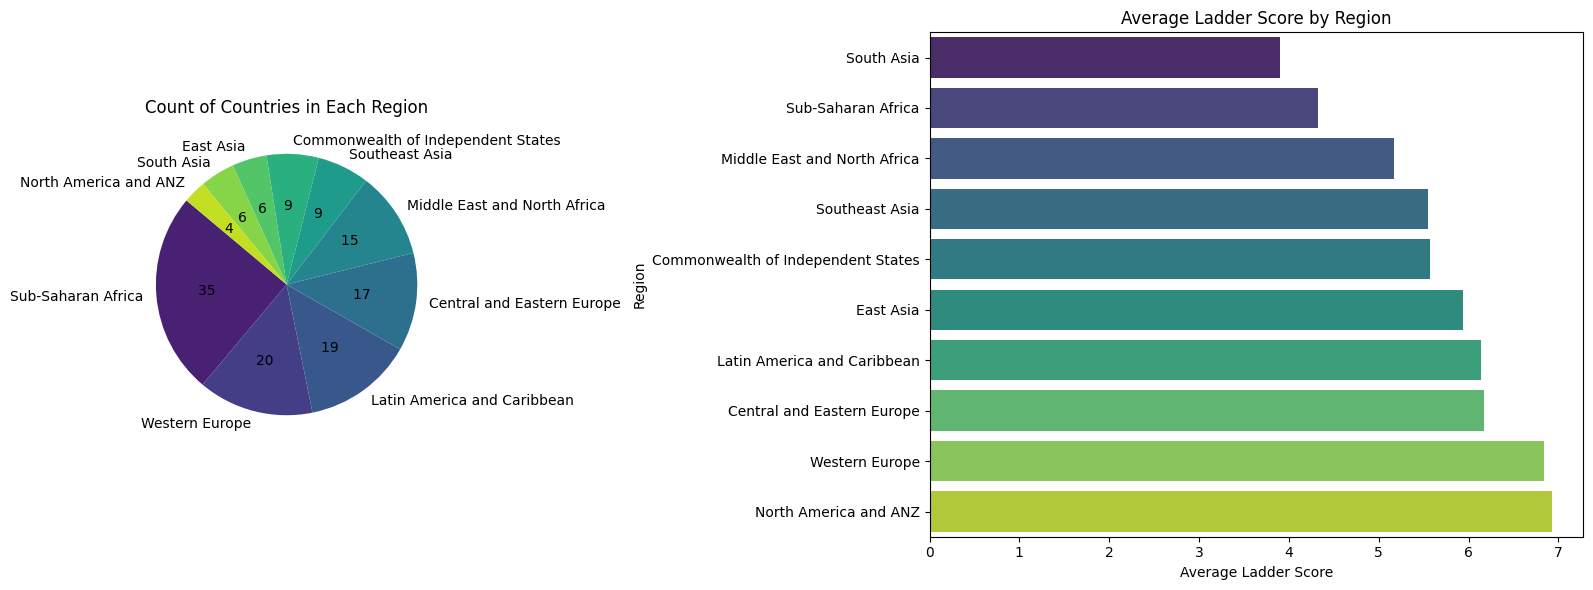

In [39]:
# Count the number of countries in each region
region_counts = df_happiness_cleaned['Regional indicator'].value_counts()

# Calculate the mean Ladder Score for each region
region_ladder_score = df_happiness_cleaned.groupby('Regional indicator')['Ladder score'].mean().sort_values()

# Set the figure size and layout with relative widths
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 2]})  # 35% width for pie, 65% for bar

# Pie chart on the left (35% of space)
def autopct_count(pct):
    total = sum(region_counts.values)
    count = int(round(pct * total / 100.0))
    return f'{count} '

axes[0].pie(region_counts.values, labels=region_counts.index, autopct=autopct_count, startangle=140, 
            colors=sns.color_palette('viridis', len(region_counts)))
axes[0].set_title('Count of Countries in Each Region')

# Horizontal bar chart on the right (65% of space)
sns.barplot(y=region_ladder_score.index, x=region_ladder_score.values, palette='viridis', ax=axes[1])
axes[1].set_title('Average Ladder Score by Region')
axes[1].set_xlabel('Average Ladder Score')
axes[1].set_ylabel('Region')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The pie chart depicting the distribution of countries by region in the World Happiness Report highlights the diversity of representation across various regions. 

- **Sub-Saharan Africa** has the highest number of countries, indicating significant contributions to the overall happiness analysis.
- **Western Europe** and **Latin America** follow, showcasing their importance in the dataset.
- Conversely, regions like **North America** and **ANZ** are less represented, suggesting a narrower range of happiness data. 
 

The horizontal bar chart illustrating the average Ladder Scores by region in the World Happiness Report reveals significant variations in happiness levels across different areas.

- **North America and ANZ** ranks highest, with an average Ladder Score of 6.93, indicating a relatively high level of happiness in these regions.
- **Western Europe** and **Central and Eastern Europe** also show above-average scores, reflecting strong well-being among their populations.
- Conversely, **South Asia** has the lowest average Ladder Score at 3.90, highlighting the challenges faced by countries in this region in terms of happiness and well-being.
- Other regions like **Sub-Saharan Africa** and **Middle East and North Africa** exhibit below-average scores, emphasizing the need for targeted initiatives to improve happiness levels.

### 3.2 Descriptive Statistics

In [40]:
# Get descriptive statistics for numerical columns
descriptive_stats = df_happiness_cleaned.describe()
print(descriptive_stats)

       Ladder score  Log GDP per capita  Social support  \
count    140.000000          140.000000      140.000000   
mean       5.530893            1.378807        1.134329   
std        1.181247            0.425098        0.333317   
min        1.721000            0.000000        0.000000   
25%        4.631750            1.077750        0.921750   
50%        5.800500            1.431500        1.237500   
75%        6.426250            1.741500        1.383250   
max        7.741000            2.141000        1.617000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               140.000000                    140.000000  140.000000   
mean                  0.520886                      0.620621    0.146271   
std                   0.164923                      0.162492    0.073441   
min                   0.000000                      0.000000    0.000000   
25%                   0.398000                      0.527500    0.091000   
50%         

The provided descriptive analysis summarizes key statistics for the variables related to happiness scores across 140 countries

1. **Count**: The total number of observations for each variable.

2. **Mean**: The average value of observations for a variable, providing a central measure of the data.

3. **Standard Deviation (std)**: A measure of the variation or dispersion of values around the mean, indicating how spread out the data is.

4. **Min (Minimum)**: The smallest value in the dataset, representing the lowest observation for that variable.

5. **Max (Maximum)**: The largest value in the dataset, indicating the highest observation for that variable.

6. **25th Percentile (25%)**: The value below which 25% of observations fall, providing insight into the lower quartile of the data.

7. **50th Percentile (Median or 50%)**: The middle value of ordered observations, indicating the central point of the dataset.

8. **75th Percentile (75%)**: The value below which 75% of observations fall, highlighting the upper quartile of the data.

These insights from the descriptive analysis serve as a foundation for further exploration and hypothesis generation.

### 3.3 Bar Chart: Visualization of the Three Happiest and Three Unhappiest Countries Based on Ladder Scores

C:\Users\Admin\AppData\Local\Temp\ipykernel_30628\3072259099.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_countries['Country name'], y=top_bottom_countries['Ladder score'], palette='coolwarm')


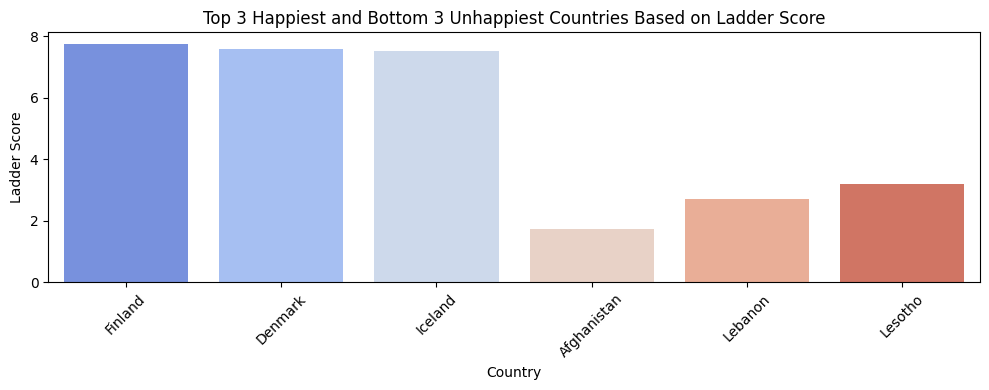

In [41]:
# Select the top 3 happiest countries
happiest_countries = df_happiness_cleaned.nlargest(3, 'Ladder score')

# Select the bottom 3 unhappiest countries
unhappiest_countries = df_happiness_cleaned.nsmallest(3, 'Ladder score')

# Combine both DataFrames
top_bottom_countries = pd.concat([happiest_countries, unhappiest_countries])

# Set the figure size
plt.figure(figsize=(10,4))

# Create the vertical bar plot
sns.barplot(x=top_bottom_countries['Country name'], y=top_bottom_countries['Ladder score'], palette='coolwarm')

# Add titles and labels
plt.title('Top 3 Happiest and Bottom 3 Unhappiest Countries Based on Ladder Score')
plt.xlabel('Country')
plt.ylabel('Ladder Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

The graph effectively illustrates the stark contrast in happiness levels among countries in the 2024 World Happiness Report, which includes data from 140 countries.

Happiest Countries:

    Finland: Ranked as the happiest country with a Ladder Score of 7.741.
    Denmark: The second happiest country with a Ladder Score of 7.583.
    Iceland: The third happiest country with a Ladder Score of 7.525.

Unhappiest Countries:

    Afghanistan: Ranked as the unhappiest country with a Ladder Score of 1.721.
    Lebanon: The second unhappiest country with a Ladder Score of 2.707.
    Lesotho: The third unhappiest country with a Ladder Score of 3.186.

This visualization highlights the critical disparities in happiness levels across different nations.


### 3.4 Histogram Distribution of Ladder Scores Among Countries

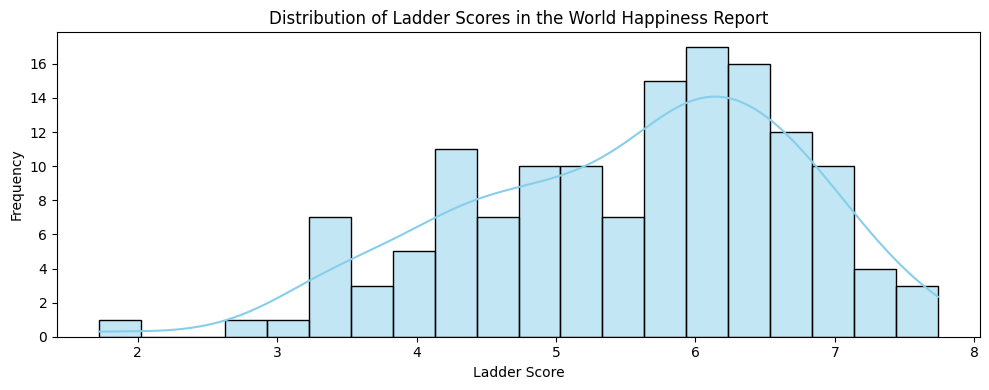

In [42]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Create the histogram
sns.histplot(df_happiness_cleaned['Ladder score'], bins=20, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Ladder Scores in the World Happiness Report')
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


The graph illustrates :

    Lowest Scores (1.72 - 3.23): Very few countries fall within this range, indicating low happiness levels.

    Mid-Range Scores (3.23 - 6.54): There is a noticeable increase in counts in the mid-range bins, particularly between 5.63 and 6.54, suggesting a concentration of countries with Ladder Scores around 5.5 to 6.5.

    Higher Scores (6.54 - 7.74): Counts decrease in the higher score bins, with only 12 countries in the 6.54 - 6.84 range and just 3 in the top bin (7.44 - 7.74), indicating a scarcity of countries with very high happiness scores.

Overall, the distribution is left-skewed, with a higher concentration of countries in the mid-range, tapering off towards the higher scores. The peaks around the bins from 5.63 to 6.54 highlight that most countries have Ladder Scores within this range.

## 3.5 Countries with less than average happiness score

In [43]:
# Calculate the average happiness score
average_happiness_score = df_happiness_cleaned['Ladder score'].mean()

# Filter countries with happiness scores less than the average
countries_below_average = df_happiness_cleaned[df_happiness_cleaned['Ladder score'] < average_happiness_score]

# Get the number of countries below the average happiness score
num_countries_below_average = countries_below_average.shape[0]

# Calculate the percentage of countries with less than average happiness score
percentage_below_average = (num_countries_below_average / df_happiness_cleaned.shape[0]) * 100

# Print the result
print(f'Number of countries with less than average happiness score: {num_countries_below_average}')

# Print the result
print(f'Percentage of countries with less than average happiness score: {percentage_below_average:.2f}%')

Number of countries with less than average happiness score: 61
Percentage of countries with less than average happiness score: 43.57%


Out of 140 countries, 61 have been identified as having below-average happiness scores, representing 43.57% of the total. This indicates that nearly half of these countries are experiencing lower-than-average levels of happiness.

## 3.5 Exploring Relationship between Ladder score and Log GDP per capita

### Scatter plot : Analyzing the Relationship Between Happiness Scores and Log GDP per Capita by Region

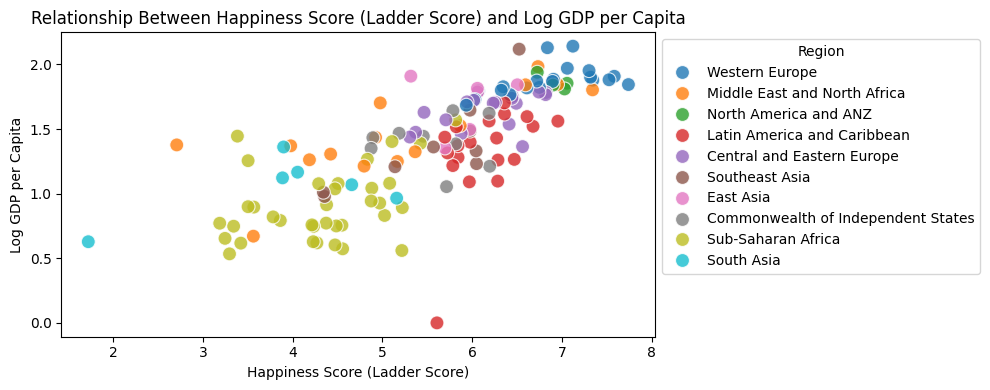

In [44]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Create the scatter plot with distinct colors for each region
sns.scatterplot(data=df_happiness_cleaned, x='Ladder score', y='Log GDP per capita', hue='Regional indicator', palette='tab10', s=100, alpha=0.8)

# Add titles and labels
plt.title('Relationship Between Happiness Score (Ladder Score) and Log GDP per Capita')
plt.xlabel('Happiness Score (Ladder Score)')
plt.ylabel('Log GDP per Capita')

# Adjust layout and add legend
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()


### Scatter plot : Regional Comparison of Average Happiness Scores and Log GDP per Capita

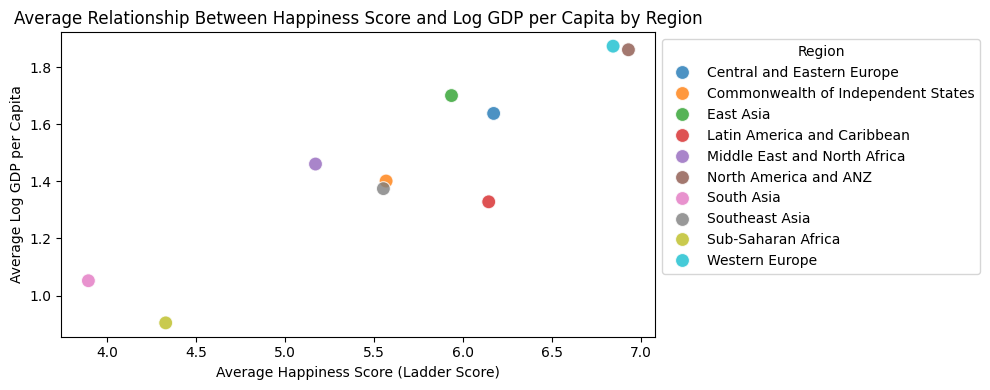

In [45]:
# Calculate the average Ladder Score and Log GDP per capita for each region
region_avg = df_happiness_cleaned.groupby('Regional indicator').agg({
    'Ladder score': 'mean',
    'Log GDP per capita': 'mean'
}).reset_index()

# Set the figure size
plt.figure(figsize=(10, 4))

# Create the scatter plot with distinct colors for each region
sns.scatterplot(data=region_avg, x='Ladder score', y='Log GDP per capita', hue='Regional indicator', palette='tab10', s=100, alpha=0.8)

# Add titles and labels
plt.title('Average Relationship Between Happiness Score and Log GDP per Capita by Region')
plt.xlabel('Average Happiness Score (Ladder Score)')
plt.ylabel('Average Log GDP per Capita')

# Adjust layout and add legend
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()


***After careful examination of the scatter plots, particularly:***

### Scatter Plot: Analyzing the Relationship Between Happiness Scores and Log GDP per Capita by Region  
### Scatter Plot: Regional Comparison of Average Happiness Scores and Log GDP per Capita  

the presence of outliers was detected. Notably, Venezuela (Latin America and Caribbean) has a reported GDP of 0 (row 78), which significantly skews the average GDP for the region. This outlier creates a misleading understanding of the relationship between GDP and Ladder Score. It is highly unlikely for a country to have a GDP of 0; rather, this figure may represent a country in extreme crisis, where GDP can be very close to zero.

Given that the remaining data for Venezuela appears normal, a temporary removal of this row was deemed necessary to derive more accurate insights without the influence of this outlier.

Additionally, Afghanistan (South Asia, row 142) has an average Ladder Score of 1.721, which is notably lower than the other countries in this region. This low score pulls down the average Ladder Score for the region, further distorting the relationship between GDP and Ladder Score. Consequently, a temporary removal of this row was also implemented to gain clearer insights free from the impact of this outlier.


### Scatter Plot: Analyzing the Relationship Between Happiness Scores and Log GDP per Capita by Region
###  (Excluding Rows 78 and 142)

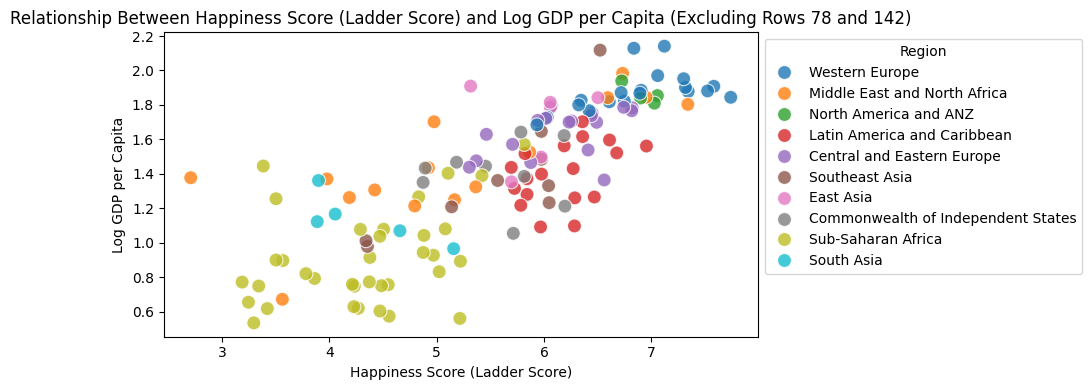

In [46]:
# Create a copy of the DataFrame to work with temporarily
df_temp = df_happiness_cleaned.copy()

# Temporarily drop the rows with indexes 78 and 142
df_temp = df_temp.drop(index=[78, 142])

# Set the figure size
plt.figure(figsize=(10, 4))

# Create the scatter plot with distinct colors for each region
sns.scatterplot(data=df_temp, x='Ladder score', y='Log GDP per capita', hue='Regional indicator', palette='tab10', s=100, alpha=0.8)

# Add titles and labels
plt.title('Relationship Between Happiness Score (Ladder Score) and Log GDP per Capita (Excluding Rows 78 and 142)')
plt.xlabel('Happiness Score (Ladder Score)')
plt.ylabel('Log GDP per Capita')

# Adjust layout and add legend
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()

### Scatter plot : Regional Comparison of Average Happiness Scores and Log GDP per Capita(Excluding Rows 78 and 142)

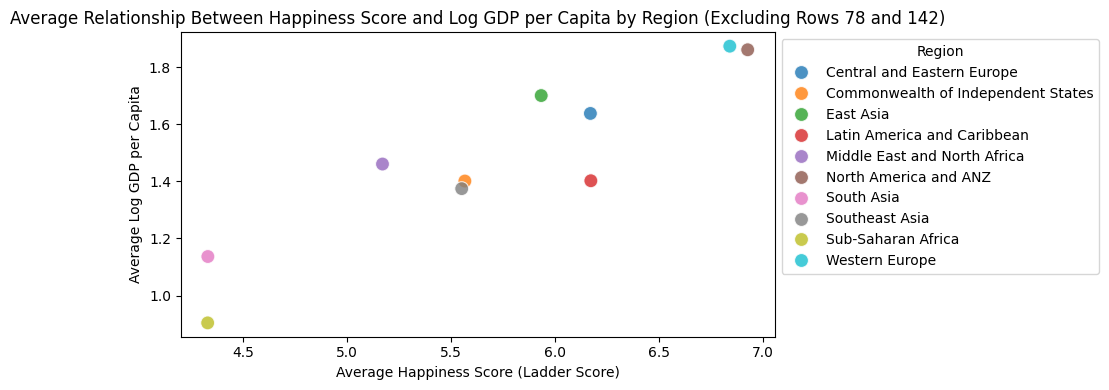

In [47]:
# Create a copy of the DataFrame to work with temporarily
df_temp = df_happiness_cleaned.copy()

# Temporarily drop the rows with indices 78 and 142
df_temp = df_temp.drop(index=[78, 142])

# Calculate the average Ladder Score and Log GDP per capita for each region after dropping rows 78 and 142
region_avg_temp = df_temp.groupby('Regional indicator').agg({
    'Ladder score': 'mean',
    'Log GDP per capita': 'mean'
}).reset_index()

# Set the figure size
plt.figure(figsize=(10, 4))

# Create the scatter plot with distinct colors for each region
sns.scatterplot(data=region_avg_temp, x='Ladder score', y='Log GDP per capita', hue='Regional indicator', palette='tab10', s=100, alpha=0.8)

# Add titles and labels
plt.title('Average Relationship Between Happiness Score and Log GDP per Capita by Region (Excluding Rows 78 and 142)')
plt.xlabel('Average Happiness Score (Ladder Score)')
plt.ylabel('Average Log GDP per Capita')

# Adjust layout and add legend
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()


In [48]:
# Create a copy of the DataFrame to work with temporarily
df_temp = df_happiness_cleaned.copy()

# Temporarily drop the rows with indexes 78 and 142
df_temp = df_temp.drop(index=[78, 142])

# Calculate the average Ladder Score and Log GDP per capita for each region
region_avg_temp = df_temp.groupby('Regional indicator').agg({
    'Ladder score': 'mean',
    'Log GDP per capita': 'mean'
}).reset_index()

# Display the average values
print(region_avg_temp)


                   Regional indicator  Ladder score  Log GDP per capita
0          Central and Eastern Europe      6.170941            1.637765
1  Commonwealth of Independent States      5.567111            1.401000
2                           East Asia      5.934333            1.700333
3         Latin America and Caribbean      6.173167            1.402000
4        Middle East and North Africa      5.170733            1.460533
5               North America and ANZ      6.927750            1.860750
6                          South Asia      4.330600            1.136600
7                      Southeast Asia      5.551889            1.374333
8                  Sub-Saharan Africa      4.329686            0.904171
9                      Western Europe      6.841650            1.873350


***Observations from Scatter Plots***

Scatter Plot: Analyzing the Relationship Between Happiness Scores and Log GDP per Capita (Excluding Rows 78 and 142)

    Higher GDP, Higher Happiness
    Regions with higher Log GDP per capita, such as North America, ANZ, and Western Europe, report higher average happiness scores. This suggests that as economic output increases, individuals in these regions tend to report higher levels of happiness.

    Lower GDP, Lower Happiness
    Conversely, regions with lower GDP figures, like Sub-Saharan Africa and South Asia, exhibit lower average happiness scores. This indicates that economic challenges may negatively impact overall well-being and happiness.

***Exceptions***

While the general trend supports the positive correlation between happiness scores and GDP, some exceptions exist, particularly in the Middle East and North Africa. Despite having a GDP higher than Southeast Asia and the Commonwealth of Independent States, this region has been observed to have lower average happiness scores. This discrepancy suggests that happiness scores in these countries may be significantly influenced by factors other than GDP, such as political instability, social unrest, and cultural expectations.

***Conclusion***

While the relationship may not be strictly linear and is influenced by various factors, the overall analysis suggests that higher GDP levels are generally associated with higher happiness scores. Therefore, it is reasonable to conclude that there is a positive correlation between happiness and GDP across the regions examined.

## 3.6 Showing  the relationship between Happiness score and the other relevant variables

### Using Correlation Matrix Heatmap

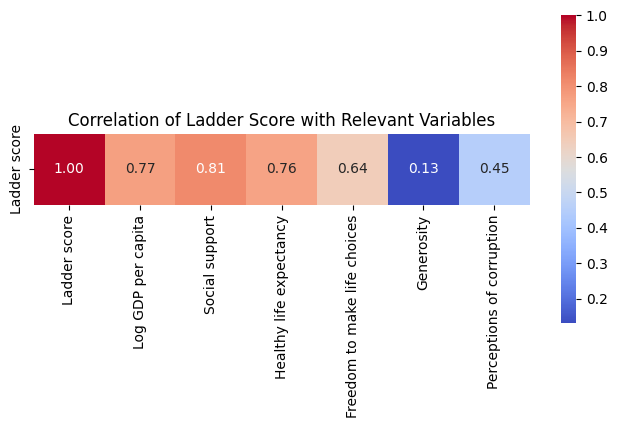

In [49]:
# Select only the relevant numeric columns
relevant_columns = ['Ladder score', 'Log GDP per capita', 'Social support', 
                    'Healthy life expectancy', 'Freedom to make life choices', 
                    'Generosity', 'Perceptions of corruption']

# Calculate the correlation matrix for the relevant columns
correlation_matrix = df_happiness_cleaned[relevant_columns].corr()

# Focus only on the correlations of Ladder score with other variables
ladder_correlation = correlation_matrix[['Ladder score']].T

# Set the figure size
plt.figure(figsize=(8, 4))

# Create a heatmap for the Ladder score correlations
sns.heatmap(ladder_correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title
plt.title('Correlation of Ladder Score with Relevant Variables')
plt.show()


### Ranking of Variables Affecting Happiness Score

***Social Support (0.81)***
        
        Interpretation: There is a strong positive correlation between social support and happiness scores. This indicates that individuals who perceive they have more social support from friends, family, and community tend to report higher levels of happiness. The higher the social support, the greater the likelihood of individuals feeling happier and more fulfilled in their lives.

***Log GDP per Capita (0.77)***

        Interpretation: There is a strong positive correlation between Log GDP per Capita and happiness scores. This suggests that as a country’s economic output per person increases, individuals report higher levels of happiness. This relationship reflects the idea that higher economic prosperity often provides access to better living standards, services, and opportunities, which can enhance overall well-being.

***Healthy Life Expectancy (0.76)***

        Interpretation: A strong positive correlation exists between healthy life expectancy and happiness scores. This implies that countries where people live longer, healthier lives tend to report higher happiness levels. Good health contributes to happiness by enabling individuals to participate more fully in life and enjoy activities without the constraints of illness or disability.

***Freedom to Make Life Choices (0.64)***

        Interpretation: There is a moderate positive correlation between the freedom to make life choices and happiness scores. This indicates that individuals who feel they have the freedom to make choices that affect their lives generally report higher happiness levels. The ability to make personal decisions fosters a sense of control and autonomy, contributing positively to well-being.

***Perceptions of Corruption (0.45)***

        Interpretation: There is a moderate positive correlation between perceptions of corruption and happiness scores. This suggests that countries where individuals perceive less corruption in government and business tend to report higher happiness. Lower corruption levels can foster trust in institutions and enhance quality of life, while high corruption may lead to disillusionment and unhappiness.
        
***Generosity (0.13)***

       Interpretation: The correlation between generosity and happiness scores is positive but weak. This indicates that while societies with higher levels of charitable giving or altruism tend to report slightly higher happiness scores, the strength of this relationship is not as pronounced as that of other factors.

### Using Pair plot 

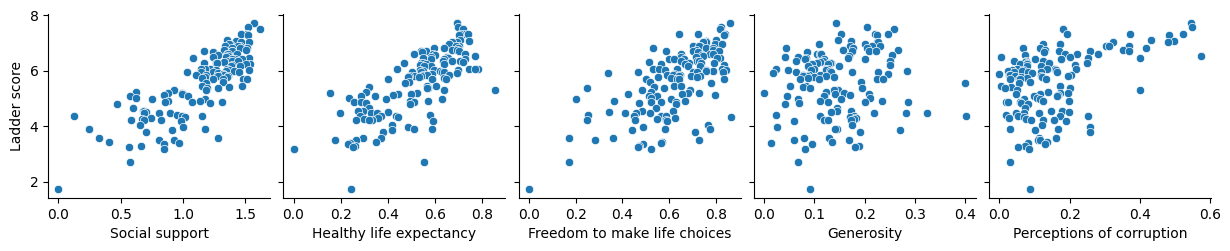

In [50]:
# Select the Ladder Score and the other variables of interest
variables_of_interest = ['Ladder score', 'Social support', 
                         'Healthy life expectancy', 'Freedom to make life choices', 
                         'Generosity', 'Perceptions of corruption']

# Create a new DataFrame with just the Ladder score and the other variables
df_ladder_only = df_happiness_cleaned[variables_of_interest]

# Create a pairplot focusing on Ladder score against the other variables
sns.pairplot(df_ladder_only, x_vars=variables_of_interest[1:], y_vars=['Ladder score'])

# Show the plot
plt.show()

The pair plot presents scatter plots for each variable against the happiness score (Ladder Score), allowing us to visually assess the relationships:

- **Log GDP per Capita vs. Ladder Score**: The scatter plot displays a clear upward trend, indicating that as GDP per capita increases, the happiness score tends to rise as well. This suggests that wealthier nations generally report higher happiness levels.

- **Social Support vs. Ladder Score**: The plot shows a tight clustering of points along an upward slope, suggesting a strong positive relationship. Higher levels of social support correlate with increased happiness, reinforcing the idea that community and relationships significantly contribute to individual well-being.

- **Healthy Life Expectancy vs. Ladder Score**: The scatter plot illustrates a positive trend, with points generally rising as healthy life expectancy increases. This indicates that individuals in countries with better health outcomes tend to report higher happiness levels.

- **Freedom to Make Life Choices vs. Ladder Score**: The scatter plot indicates a moderate upward trend, implying that as individuals feel they have more freedom in their life choices, their happiness scores also increase.

- **Perceptions of Corruption vs. Ladder Score**: The scatter plot shows a more scattered distribution but with a slight upward tendency. This suggests that countries perceived to be less corrupt may have slightly higher happiness scores, though the relationship is not as strong as with other variables.

- **Generosity vs. Ladder Score**: The scatter plot reveals a weak and somewhat scattered relationship, indicating that while there are instances where higher generosity correlates with increased happiness, the relationship is not consistent across the dataset.

Overall, the pair plot visually demonstrates that economic prosperity, social support, health, and personal freedom are important contributors to happiness, while perceptions of corruption and generosity show weaker or more variable relationships.

### Recommendations

- **Enhance Social Support Networks**: Given the significant correlation between social support and happiness, initiatives aimed at strengthening community ties and social networks can be beneficial. Programs that encourage social interaction, community service, and support groups can help individuals feel more connected and supported.

- **Promote Economic Growth**: Since there is a strong positive correlation between Log GDP per capita and happiness scores, policymakers should focus on strategies that foster economic growth and improve the economic output per person. This can include supporting local businesses, attracting foreign investment, and creating job opportunities.

- **Invest in Health Services**: The positive correlation between healthy life expectancy and happiness underscores the importance of accessible healthcare services. Investments in public health initiatives, preventive care, and wellness programs can enhance the overall health of the population, leading to increased happiness.

- **Encourage Freedom and Autonomy**: Since the freedom to make life choices is positively correlated with happiness, policies that promote personal freedom, autonomy, and individual rights should be prioritized. This can involve fostering an environment where individuals can pursue their passions and make choices that align with their values and desires.

- **Address Perceptions of Corruption**: Since perceptions of corruption negatively impact happiness, efforts to improve transparency and accountability in government and business practices are essential. Building trust through anti-corruption measures can enhance overall satisfaction and well-being in society.

- **Foster Generosity and Community Involvement**: While the correlation with generosity is weaker, it remains a positive factor in happiness. Encouraging charitable activities and community involvement can enhance social bonds and contribute to a supportive society. Initiatives that highlight the benefits of giving and create opportunities for individuals to engage in altruistic behavior can promote a culture of generosity.